In [4]:
%pip install tensorflow tensorflow-gpu

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [50 lines of output]
      Traceback (most recent call last):
        File "C:\Users\blaik\AppData\Local\Temp\pip-build-env-gg2yd8io\overlay\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "C:\Users\blaik\AppData\Local\Temp\pip-build-env-gg2yd8io\overlay\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "C:\Users\blaik\AppData\Local\Temp\pip-build-env-gg2yd8io\overlay\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "C:\Users\blaik\AppData\Local\Temp\pip-build-env-gg2yd8io\overlay\Lib\site-packages\

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ba/7c/b971f2485155917ecdcebb210e021e36a6b65457394590be01cc61515310/tensorflow-2.13.0-cp310-cp310-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp310-cp310-win_amd64.whl.metadata (2.6 kB)
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ba/7c/b971f2485155917ecdcebb210e021e36a6b65457394590be01cc61515310/tensorflow-2.13.0-cp310-cp310-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp310-cp310-win_amd64.whl.metadata (2.6 kB)
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with statu

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [50 lines of output]
      Traceback (most recent call last):
        File "C:\Users\blaik\AppData\Local\Temp\pip-build-env-6kn0xa09\overlay\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "C:\Users\blaik\AppData\Local\Temp\pip-build-env-6kn0xa09\overlay\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "C:\Users\blaik\AppData\Local\Temp\pip-build-env-6kn0xa09\overlay\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "C:\Users\blaik\AppData\Local\Temp\pip-build-env-6kn0xa09\overlay\Lib\site-packages\

In [ ]:
%pip install mediapipe

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

keypoints


In [5]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [6]:
def mediapipe_detection(image,model):
    cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    result  = model.process(image)
    image.flags.writeable = True
    cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, result



In [7]:
def draw_landmarks(image, result):
    mp_drawing.draw_landmarks(image,result.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 

In [8]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(220,44,100), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=1, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(220,44,100), thickness=1, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=1, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(220,44,100), thickness=1, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=1, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(220,44,100), thickness=1, circle_radius=2)
                             ) 

In [9]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    try:
        while cap.isOpened():
            ret, frame  = cap.read()

            image, result = mediapipe_detection(frame, holistic)

            draw_styled_landmarks(image, result)

            cv2.imshow('opencv feed', image)

            if cv2.waitKey(10) & 0xFF == ord('q') :
                break
    except Exception as e:
        print(e)
        cap.release()
        cv2.destroyAllWindows()

    cap.release()
    cv2.destroyAllWindows()

EXTRACTING KEYPOINTS

In [10]:
HAND_LANDMARKS = 21 * 3
POSE_LANDMARKS = 33 * 4
FACE_LANDMARKS = 468 * 3

In [11]:
#getting the flattened array for the LSTM model and errpr handling for when features not in frame
def extract_keypoints(result):
    face = np.array([[res.x, res.y, res.z] for res in result.face_landmarks.landmark]).flatten() if result.face_landmarks else np.zeros(FACE_LANDMARKS)
    lh = np.array([[res.x, res.y, res.z] for res in result.left_hand_landmarks.landmark]).flatten() if result.left_hand_landmarks else np.zeros(HAND_LANDMARKS)
    rh = np.array([[res.x, res.y, res.z] for res in result.right_hand_landmarks.landmark]).flatten() if result.right_hand_landmarks else np.zeros(HAND_LANDMARKS)
    pose = np.array([[res.x, res.y, res.z,res.visibility] for res in result.pose_landmarks.landmark]).flatten() if result.pose_landmarks else np.zeros(POSE_LANDMARKS)
    return np.concatenate([face,lh,rh,pose])

In [12]:
len(extract_keypoints(result))

1662

In [13]:
np.zeros(3)

array([0., 0., 0.])

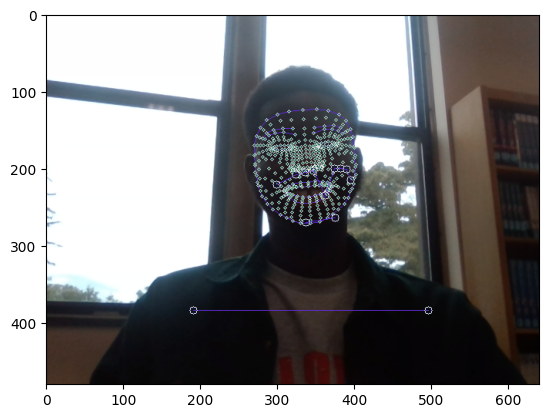

In [14]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

FOLDERS FOR COLLECTIONS

In [15]:
DATA_PATH = os.path.join('MP_data')
actions = np.array(['hello','thanks','iloveyou'])

#number of videos
no_of_sequence = 30

#length of frames
sequence_length = 30

In [16]:
#creating directories for each frame of video of each action:done
for action in actions:
    for sequence in range(no_of_sequence):
        try :
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass


trainning anf test for keypoint 

In [17]:
cap = cv2.VideoCapture(0)
flag = True

with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    for action in actions:

        for sequence in range(no_of_sequence):
            if flag == False:
                break
            for frame_num in range(sequence_length):
                if flag == False:
                    break

                try:
                    ret, frame  = cap.read()

                    image, result = mediapipe_detection(frame, holistic)

                    draw_styled_landmarks(image, result)

                    if frame_num == 0:
                        cv2.putText(image,'STARTING COLLECTION', (120,200),
                        cv2.FONT_HERSHEY_SIMPLEX,1,(220,0,0),2, cv2.LINE_AA)

                        cv2.putText(image,'Collectin frames for {} and video number {}'.format (action,sequence), (15,14),
                        cv2.FONT_HERSHEY_SIMPLEX,0.5,(220,0,0),1, cv2.LINE_AA)

                        cv2.waitKey(5000)

                    else:
                        cv2.putText(image,'Collectin frames for {} and video number{}'.format (action,sequence), (15,12),
                        cv2.FONT_HERSHEY_SIMPLEX,0.5,(220,0,0),1, cv2.LINE_AA)

                    keypoints = extract_keypoints(result)
                    frame_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                    np.save(frame_path,keypoints)


                    cv2.imshow('opencv feed', image)

                    if cv2.waitKey(10) & 0xFF == ord('q') :
                        flag = False
                        break


                except Exception as e:
                    print(e)
                    cap.release()
                    cv2.destroyAllWindows()

    cap.release()
    cv2.destroyAllWindows()